In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = np.array([
  [23.0,0x6e8],
  [22.9,0x6df],
  [24,0x733],
  [25.1,0x787],
  [24.7,0x769],
  [21.0,0x64d],
  [19.6,0x5e4],
])

data = np.sort(data, axis=0)
plt.plot(data[:,0], data[:,1])

A = np.vstack([data[:,0], np.ones(len(data))]).T
slope, yint = np.linalg.lstsq(A, data[:,1], rcond=-1)[0]

print(f'Slope: {slope} Offset: {yint}')

NameError: name 'np' is not defined

In [6]:
adc_data = 0x73b
vri_data = 0x5dF
drv_gain = 40

# Below are "hardcoded", either via ROM programming or hardware.

vr_c = 3.0
vri_c = 0x67b
full_scale = 4096

drv_v_ref = 3.3
r_sense = 0.001

print('Based on Vref@3.3V:')
vout = 3.3 * adc_data/full_scale
print(f'  ADC: {vout}')
current = ((drv_v_ref/2) - vout)/(drv_gai n*r_sense)
print(f'  Current: {current}A')

print('Based on Vrefint:')
vout = (vr_c * vri_c * adc_data) / (vri_data * full_scale)
print(f'  ADC: {vout}')
current = ((drv_v_ref/2) - vout)/(drv_gain*r_sense)
print(f'  Current: {current}A')

Based on Vref@3.3V:
  ADC: 1.4912841796874998
  Current: 3.967895507812502A
Based on Vrefint:
  ADC: 1.4964256058196108
  Current: 3.8393598545097274A


In [80]:
timer_ccr = 40
timer_arr = 2125

pulse_ns = 328
freq_loop = 40e3

# Below are "hardcoded", either via ROM programming or hardware.

v_rail = 24

duty_cycle_requested = timer_ccr / timer_arr
duty_cycle_measured = pulse_ns / (1/freq_loop*1e9)

print(f'Duty cycle:\n  requested:{duty_cycle_requested*100:.2f}%\n  measured: {duty_cycle_measured*100:.2f}%')

v_rms_requested = v_rail * np.sqrt(duty_cycle_requested)
v_rms_measured = v_rail * np.sqrt(duty_cycle_measured)

print(f'V_rms:\n  requested:{v_rms_requested:.4f}V\n  measured: {v_rms_measured:.4f}V')

v_dc_requested = v_rail * duty_cycle_requested
v_dc_measured = v_rail * duty_cycle_measured

print(f'V_dc:\n  {v_dc_requested:.4f}V\n  {v_dc_measured:.4f}V')

r_phase_requested = v_dc_requested / np.abs(current)
r_phase_measured = v_dc_measured / np.abs(current)

print(f'Estimated winding resistance:\n  requested: {r_phase_requested*1000/1.5:.3f} mOhm\n  measured: {r_phase_measured*1000/1.5:.3f} mOhm')


Duty cycle:
  requested:1.88%
  measured: 1.31%
V_rms:
  requested:3.2928V
  measured: 2.7490V
V_dc:
  0.4518V
  0.3149V
Estimated winding resistance:
  requested: 286.368 mOhm
  measured: 199.598 mOhm


[[0.139526367187498, 0.11927490234374671, 0.09902343749999543, 0.07877197265624969, 0.0585205078124984, 0.03826904296874711], [0.16691509046052322, 0.1466771175986814, 0.1264391447368396, 0.10620117187499778, 0.08596319901315597, 0.06572522615131415], [0.19426734406208235, 0.17404284521679303, 0.1538183463715037, 0.1335938475262144, 0.11336934868092508, 0.09314484983563576], [0.2215832007859242, 0.2013721580276906, 0.181161115269457, 0.1609500725112234, 0.1407390297529898, 0.1205279869947562]]


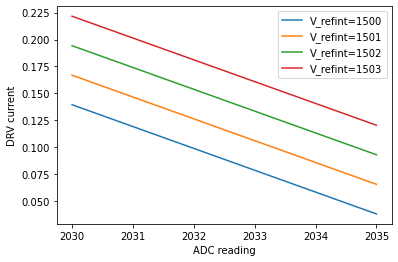

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def to_drv_current(adc_data, v_refint_data=1501):
  return (3.3/2 - to_adc_voltage(adc_data, v_refint_data)) / (40 * 0.001)

def to_adc_voltage(adc_data, v_refint_data):
  vref_charac = 3.0
  v_refint_cal_value = 1659
  full_scale = 4096
  return (vref_charac * v_refint_cal_value * adc_data) / (v_refint_data * full_scale)

results = []
v_refint_range = list(range(1500,1504))
for v_refint_data in v_refint_range:
  vref_sweep = []
  adc_data_range = list(range(2030,2036))
  for adc_data in adc_data_range:
    i_chan = to_drv_current(adc_data, v_refint_data)
    vref_sweep.append(i_chan)
  results.append(vref_sweep)

print(results)
f = plt.plot(np.tile(adc_data_range, [len(results),1]).T, np.array(results).T)
plt.xlabel('ADC reading')
plt.ylabel('DRV current')
plt.legend([f'V_refint={x}' for x in v_refint_range])

4.69114449667155
4.629442444307433
4.651730569974261
3.340117952393691
1.2816831929435324


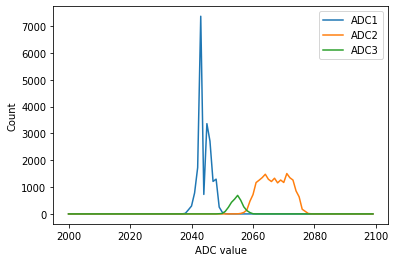

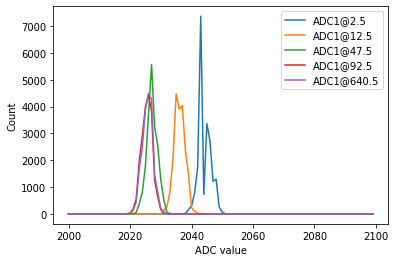

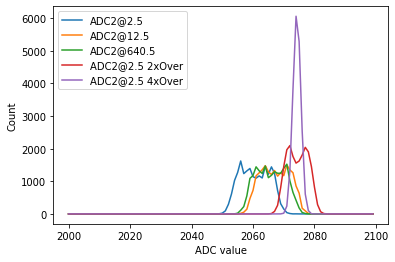

In [61]:
adc1_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
22
155
295
783
1728
7371
727
3366
2715
1211
1297
255
63
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
4
24
93
294
611
1027
1270
1623
1236
1319
1393
1142
1096
1166
1102
1460
1217
1442
1243
717
313
151
40
12
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc3_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
16
98
248
432
550
691
511
265
124
50
6
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc1a_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11
126
269
835
2087
4477
3905
4041
2382
1510
231
97
24
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc1b_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
11
49
377
808
1781
3707
5574
3258
2552
1283
517
57
18
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc1c_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
11
32
182
555
1951
2913
3978
4443
3814
1270
646
160
40
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc1d_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
31
134
433
1688
2496
3878
4499
4278
1461
822
203
69
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2a_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
3
17
53
145
473
720
1169
1259
1354
1479
1293
1208
1331
1158
1264
1172
1505
1348
1263
857
638
174
94
15
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2b_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
9
57
157
402
909
1087
1354
1454
1262
1446
1096
1204
1277
1151
1288
1321
1548
1243
875
528
246
56
26
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2c_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
3
2
22
113
225
555
1090
1179
1444
1322
1240
1468
1111
1184
1295
1247
1244
1398
1525
1012
660
418
183
43
12
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2d_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
11
77
265
807
1452
1967
2095
1761
1558
1622
1806
2042
1904
1452
814
285
67
12
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc2e_values = '''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
21
240
1329
3818
6061
5287
2527
609
102
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0'''

adc1_values = [int(x) for x in adc1_values.split('\n')]
adc1a_values = [int(x) for x in adc1a_values.split('\n')]
adc1b_values = [int(x) for x in adc1b_values.split('\n')]
adc1c_values = [int(x) for x in adc1c_values.split('\n')]
adc1d_values = [int(x) for x in adc1d_values.split('\n')]

adc2_values = [int(x) for x in adc2_values.split('\n')]
adc2a_values = [int(x) for x in adc2a_values.split('\n')]
adc2b_values = [int(x) for x in adc2b_values.split('\n')]
adc2c_values = [int(x) for x in adc2c_values.split('\n')]
adc2d_values = [int(x) for x in adc2d_values.split('\n')]
adc2e_values = [int(x) for x in adc2e_values.split('\n')]

adc3_values = [int(x) for x in adc3_values.split('\n')]


x = 2000 + np.array(range(len(adc1_values)))

values = np.array([adc1_values,adc2a_values, adc3_values])
plt.plot(np.tile(x, [len(values), 1]).T, values.T)
plt.xlabel('ADC value')
plt.ylabel('Count')
plt.legend(['ADC1', 'ADC2', 'ADC3'])

plt.figure()

values = np.array([adc1_values,adc1a_values, adc1b_values, adc1c_values, adc1d_values])
plt.plot(np.tile(x, [len(values), 1]).T, values.T)
plt.xlabel('ADC value')
plt.ylabel('Count')
plt.legend(['ADC1@2.5', 'ADC1@12.5', 'ADC1@47.5', 'ADC1@92.5', 'ADC1@640.5'])

plt.figure()

values = np.array([adc2_values,adc2a_values, adc2c_values, adc2d_values, adc2e_values])
plt.plot(np.tile(x, [len(values), 1]).T, values.T)
plt.xlabel('ADC value')
plt.ylabel('Count')
plt.legend(['ADC2@2.5', 'ADC2@12.5', 'ADC2@640.5', 'ADC2@2.5 2xOver', 'ADC2@2.5 4xOver'])

for x in values:
  print(np.std(np.repeat(range(100), x)))

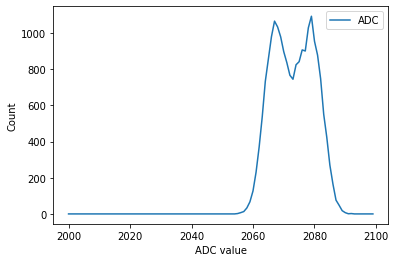

In [62]:
adc='''0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
7
13
33
67
127
231
370
536
732
856
979
1065
1033
978
896
836
766
744
824
841
906
900
1028
1092
954
877
746
550
423
270
165
76
48
18
7
1
2
0
0
0
0
0
0
0'''


adc = [int(x) for x in adc.split('\n')]


x = 2000 + np.array(range(len(adc1_values)))

values = np.array([adc])
plt.plot(np.tile(x, [len(values), 1]).T, values.T)
plt.xlabel('ADC value')
plt.ylabel('Count')
plt.legend(['ADC'])